In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("C:/Users/shind/JupiterWorking/iNuron/EDA/student_performance/data/student.csv")

data.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [24]:
data['gender'].dtypes == 'O'


True

In [25]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [26]:
num_col = [fea for fea in data.columns if data[fea].dtype != 'O']
num_col

['math score', 'reading score', 'writing score']

In [27]:
cat_col = [fea for fea in data.columns if data[fea].dtype == 'O']


In [28]:
data[num_col]


,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [29]:
data[cat_col]

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [30]:
data.memory_usage()

Index                           128
gender                         8000
race/ethnicity                 8000
parental level of education    8000
lunch                          8000
test preparation course        8000
math score                     8000
reading score                  8000
writing score                  8000
dtype: int64

## missing value


In [31]:
# check null values
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [32]:
# check duplicate values
data.duplicated().sum()

0

In [33]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [34]:
data['gender'].unique()

array(['female', 'male'], dtype=object)

In [35]:
for i in data.columns:
    print(i,":" ,data[i].unique())
    print()

gender : ['female' 'male']

race/ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']

parental level of education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

lunch : ['standard' 'free/reduced']

test preparation course : ['none' 'completed']

math score : [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]

reading score : [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]

writing score : [ 74  

In [36]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [37]:
data.cov()

,math score,reading score,writing score
math score,229.918998,180.998958,184.939133
reading score,180.998958,213.165605,211.786661
writing score,184.939133,211.786661,230.907992


In [38]:
data.skew()

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

<AxesSubplot:xlabel='math score', ylabel='Density'>

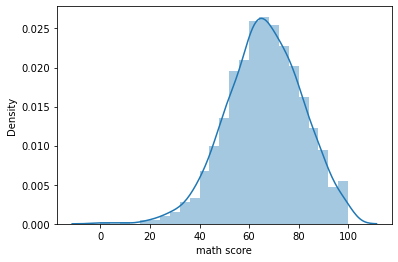

In [39]:
sns.distplot(data['math score'])

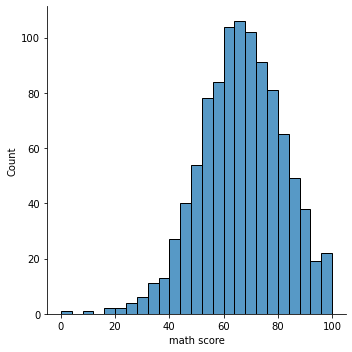

In [40]:
sns.displot(data['math score'])

In [41]:
data['Average'] = (data['math score']+data['reading score']+data['writing score'])/3

data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [42]:
data.groupby('gender').count()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average
gender,,,,,,,,
female,518,518,518,518,518,518,518,518
male,482,482,482,482,482,482,482,482


In [43]:
# No of student having marks less than 20

data[data['Average']<30].count()



gender                         9
race/ethnicity                 9
parental level of education    9
lunch                          9
test preparation course        9
math score                     9
reading score                  9
writing score                  9
Average                        9
dtype: int64

In [45]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Average'],
      dtype='object')

In [46]:
num_col

['math score', 'reading score', 'writing score']

In [47]:
data_num = data[num_col]
data_num.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [49]:
from scipy.stats import normaltest

normaltest(data_num['math score'])[1]*100




0.04508029386993784

<AxesSubplot:>

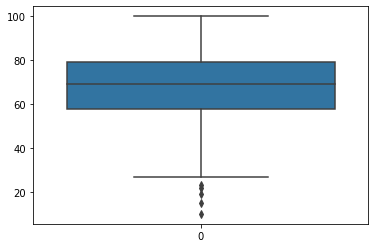

In [50]:
sns.boxplot(data=data['writing score'])

<AxesSubplot:xlabel='math score'>

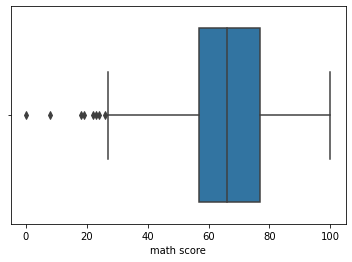

In [51]:
sns.boxplot(data['math score'])

<AxesSubplot:>

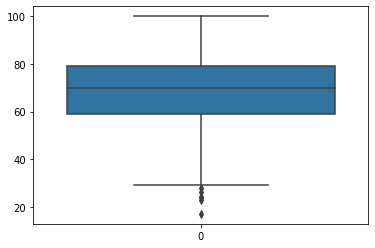

In [52]:
sns.boxplot(data=data['reading score'])

<AxesSubplot:xlabel='reading score', ylabel='Density'>

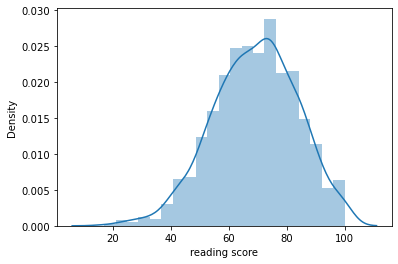

In [53]:
sns.distplot(data['reading score'])

<AxesSubplot:xlabel='writing score', ylabel='Density'>

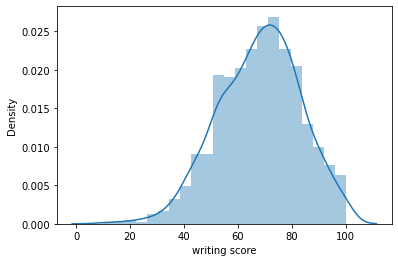

In [54]:
sns.distplot(data['writing score'])

In [55]:
data['math score'].quantile(0.10)
data['math score'].quantile(0.90)

86.0

In [56]:
data['math score'].unique()

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8], dtype=int64)

In [57]:
def get_iqr(data,column_name,q1_range,q3_range):
    q1 = data[column_name].quantile(q1_range)
    q2 = data[column_name].quantile(q3_range)
    IQR = q3-q1
    upper_fence = q3+1.5 *IQR
    lower_fence = q1-1.5 *IQR
    return IQR,upper_fence,lower_fence

In [62]:
def outlier_threashold(data,variable):
    q1 = data[variable].quantile(0.25)
    q2 = data[variable].quantile(0.75)
    iqr = q2-q1
    up_limit = q2+ (1.5*iqr)
    lower_limit = q1-(1.5*iqr)
    return lower_limit,up_limit


for variable in data_num.columns:
    lower_limit,upper_limit = outlier_threashold(data_num,variable)
    print(lower_limit,upper_limit)

27.0 107.0
29.0 109.0
25.875 110.875


In [66]:
def replace_with_threashold(data,numeric_column):
    for variable in data_num.columns:
        lower_limit,up_limit = outlier_threashold(data_num,variable)
        data.loc[data[variable]<lower_limit,variable]=lower_limit
        data.loc[data[variable]>up_limit,variable]=up_limit
        

In [65]:
replace_with_threashold(data_num,data_num.columns)


In [67]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [68]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


<AxesSubplot:xlabel='gender', ylabel='count'>

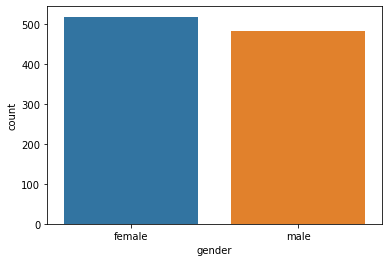

In [70]:
sns.countplot(data['gender'])

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

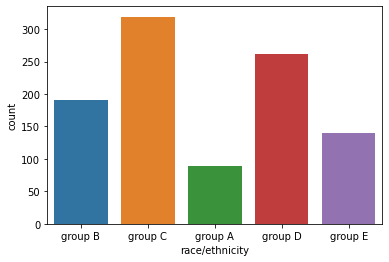

In [71]:
sns.countplot(data['race/ethnicity'])

In [74]:
df = data.groupby('gender').mean()
df

,math score,reading score,writing score,Average
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


In [76]:
df["math score"][1]


68.72821576763485

In [78]:
df["reading score"][1]


65.47302904564316

<AxesSubplot:xlabel='math score', ylabel='count'>

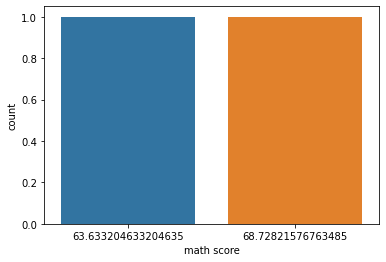

In [79]:
plt.figure(figsize=10,10)
X = ['Total avg','math avg']


<AxesSubplot:>

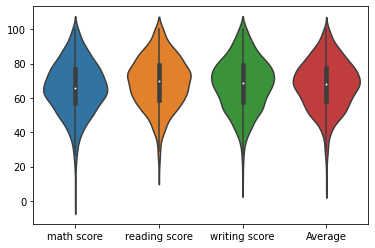

In [81]:
sns.violinplot(data=data)